In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score

In [2]:
#2.load dataset
df = pd.read_csv('/home/vamshi/Downloads/Week8_Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#3.no.of rows and columns
df.shape

(150, 6)

In [4]:
#4.display data types of each column
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
#5.print attribute names
df['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [6]:
#6.display first 5 rows of the dataset
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#7.display last 5 rows of the dataset
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
#8.display unique class labels in the 'Species' column
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
#9.no.ofrows in each column
df.groupby('Species').count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [10]:
#9.missing values in each column
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
#10.drop id column
df.drop(columns=['Id'], inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
#11.display summary statistics of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


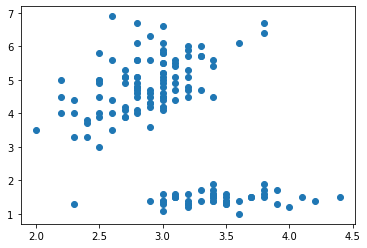

In [14]:
#13.scatterplot for SepalLengthCm vs SepalWidthCm
plt.scatter(df['SepalWidthCm'], df['PetalLengthCm'])

<Axes: xlabel='PetalWidthCm'>

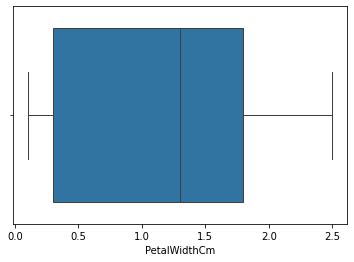

In [15]:
#15.boxplot for PetalWidthCm
sns.boxplot(data=df, x='PetalWidthCm')

<Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

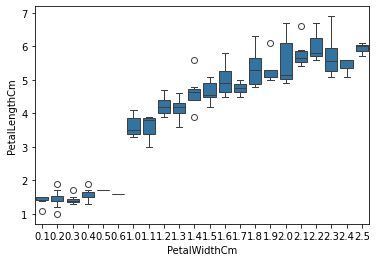

In [16]:
#16.box-plot for PetalLengthCm vs PetalWidthCm
sns.boxplot(data=df, x='PetalWidthCm', y='PetalLengthCm')

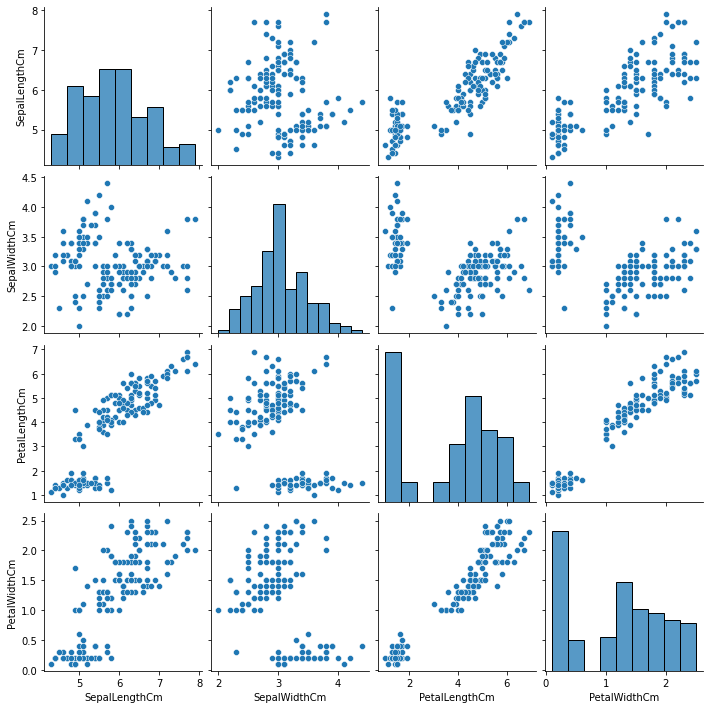

In [17]:
#17.pairplot for the dataset
sns.pairplot(data=df)

In [18]:
#18.corelation for the dataset
df.iloc[:, :-1].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [19]:
#19.prepare x and y variables
X = df.drop(columns=['Species'])
y = df['Species']

In [20]:
#20.split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)

In [21]:
#21 22 & 23.create a model
model = SVC(C=1)

In [22]:
#24.train a model
model.fit(X_train, y_train)

SVC(C=1)

In [23]:
#25.predict 
y_pred = model.predict(X_test)

In [24]:
#26 - 28.evaluate the model using classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [25]:
#29.K-Fold cross-validation
cv = KFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

In [26]:
np.mean(scores)

0.9718181818181819

In [27]:
#30-33.Grid Search for hyperparameter tuning
param_grid = {
    'C' : [0.1, 1, 10, 100, 1000]
}
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')


<IPython.core.display.Javascript object>

In [28]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(C=1), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [29]:
c = grid_search.best_params_['C']
model = SVC(C=c)

In [30]:
model.fit(X_train, y_train)

SVC(C=1)

In [31]:
y_pred = model.predict(X_test)

In [32]:
#34.evaluate the model again
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [33]:
type(df['SepalLengthCm'])

pandas.core.series.Series

In [34]:

#35.isplay the best parameters
print("Best parameters found: ", grid_search.best_params_)
#36.display the best score
print("Best score found: ", grid_search.best_score_)

Best parameters found:  {'C': 1}
Best score found:  0.9718181818181819
